## Masked Matrix Transform


Copyright 2020, Brian H. Clowers

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Inline Plotting

In [1]:
%matplotlib inline

#### Library and Standard Imports

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy import signal
from numpy.fft import fft, ifft

In [3]:
import sys, os, time

## The following uses a 5-bit sequences as an example and higher bit orders are compatible with the same strategy.

### A 5-bit sequence is: '0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1'

In [4]:
seqTxt = '0000100101100111110001101110101'
seq = []
for e in seqTxt:
    seq.append(int(e))

In [5]:
seq = np.array(seq, dtype = np.float)#convert sequence

### Create mask of the cyclic PRBS

In [6]:
def createSeqMTX(useSeq):
    '''
    useSeq is the target sequence used for modulate (not oversampled)
    '''
    seqMTX = np.zeros([len(useSeq), len(useSeq)])
    for i in range(len(useSeq)):
        seqMTX[i,:] = np.roll(useSeq,i)
    return seqMTX

In [7]:
seqMTX = createSeqMTX(seq)

## Plot Standard S-Matrix

Text(0.5, 1.0, '5-Bit S-Matrix')

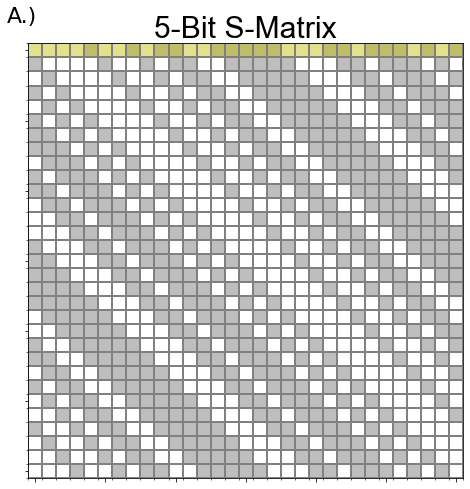

In [8]:
fig, ax = plt.subplots(nrows = 1, figsize = (12,8))

useSeq = seq

ax0 = ax
cName = 'binary'
cmap=plt.get_cmap(cName)

dummyMtx = np.zeros_like(seqMTX)

ax.imshow(seqMTX, interpolation='none', cmap = cmap, aspect = 1.0)#, extent = extent)
ax.imshow(dummyMtx, interpolation='none', cmap = cmap, aspect = 1.0, alpha = 0.75)#, extent = extent)
ax.set_xticks(np.arange(-.5, len(useSeq), 1), minor=True);
ax.set_yticks(np.arange(-.5, len(useSeq), 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
ax.grid(False, which='major')
ax.set_yticklabels([])
ax.set_xticklabels([])

# Create a Rectangle patch
rect = patches.Rectangle((-0.5,-0.5),31,1,linewidth=1,edgecolor='r',facecolor='y', alpha = 0.45)

# Add the patch to the Axes
ax.add_patch(rect)


ax.annotate("A.)", (-2, -2), fontsize="22", annotation_clip=False)

plt.title("5-Bit S-Matrix", fontname="Arial", fontsize = 30)
# plt.savefig("SMTX_5Bit.png", bbox_inches='tight', pad_inches = 0, dpi = 300)

### Masked Matrix Generation (Algorithm #1)
~~~python
randomSeed(42) #set random seed for reproducibility
prbs #binary Simplex sequence
maskWindow #user-defined mask length
maskMTX #unpopulated matrix of zeros equivalent to the full S-matrix
for i,row in enumerate(maskMTX):
    #random mask value
    maskVal = randInt #random integer
    #random mask start point
    maskStart = randInt
    tempSeq = copy(prbs)
    tempSeq[maskStart:maskStart+maskWindow] = maskVal
    #fill mask matrix 
    maskMTX[i] = tempSeq
~~~

### Masked Matrix Generation

In [9]:
rollMtx = seqMTX.copy() #generate a copy in memory
maskMtx = np.zeros_like(seqMTX)+0.5

In [10]:
sLen = 2**5-1 #Length of the PRBS
win = 5 #Window to create the mask.  This is a variable and can be manipulated to suit.  A decent starting point is the order of the PRBS
randBool = False #User choice to create a non-consecutive random value, NOT USED

In [11]:
np.random.seed(42) #make random value predicable (HHGTTG)

In [12]:
for i in range(maskMtx.shape[0]):
    tempVec = maskMtx[0,:].copy()#first row which would be used for a standard Hadamard transform
    randVal = np.random.rand() #random value to use and insert in the mask window
    if i > 0:
        if randBool:#use for the randomization of the mask
            tempInd = np.random.randint(sLen, size = int(sLen/2))
            tempVec[tempInd] = randVal
        else:
            indA = np.random.randint(sLen)
            indB = (indA+win)%sLen
            tempVec[indA:indB] = randVal
        maskMtx[i,:] = tempVec
    
    rollMtx[i,:] = np.roll(rollMtx[i,:], -i)# roll so that each row is the same as row 0 but now contains the mask

Text(0.5, 1.0, '5-Bit Mask-Matrix')

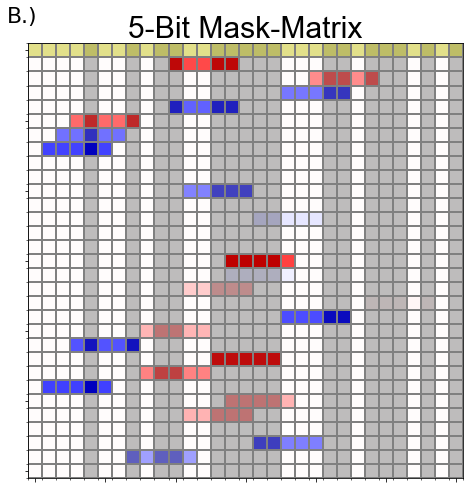

In [13]:
fig, ax = plt.subplots(nrows = 1, figsize = (12,8))

useSeq = seq

ax0 = ax


cName = 'bwr'
cmap=plt.get_cmap(cName)

ax0.imshow(rollMtx, interpolation='none', cmap = 'binary', aspect = 1.0)#, extent = extent)
ax0.imshow(maskMtx, interpolation='none', cmap = cmap, aspect = 1.0, alpha = 0.75)#, extent = extent)

ax0.set_xticks(np.arange(-.5, len(useSeq), 1), minor=True);
ax0.set_yticks(np.arange(-.5, len(useSeq), 1), minor=True);

# Gridlines based on minor ticks
ax0.grid(which='minor', color='grey', linestyle='-', linewidth=2)
ax0.grid(False, which='major')
ax0.set_yticklabels([])
ax0.set_xticklabels([])

# Create a Rectangle patch
rect = patches.Rectangle((-0.5,-0.5),31,1,linewidth=1,edgecolor='r',facecolor='y', alpha = 0.45)

# Add the patch to the Axes
ax0.add_patch(rect)

ax0.annotate("B.)", (-2, -2), fontsize="22", annotation_clip=False)

plt.title("5-Bit Mask-Matrix", fontname="Arial",fontsize = 30)
# plt.savefig("Masked_MTX_5Bit.png", bbox_inches='tight', pad_inches = 0, dpi = 300)

#### *Pick the file you want (use `ls` command)*

#### Files distributed with this example:
* Raw_622.csv
* Raw_922.csv
* Raw_1822.csv

### These traces are the raw vectors extracted from the TOF file for select tune mix ions.  Each data point corresponds to approximately 0.165576 ms

In [14]:
csvFiles = ['Raw_622.csv', 'Raw_922.csv', 'Raw_1822.csv']

In [15]:
fileName = csvFiles[1] #622

Load Target CSV

In [16]:
data = np.loadtxt(fileName, delimiter = ',')
x = data[:,0]
y = data[:,1]

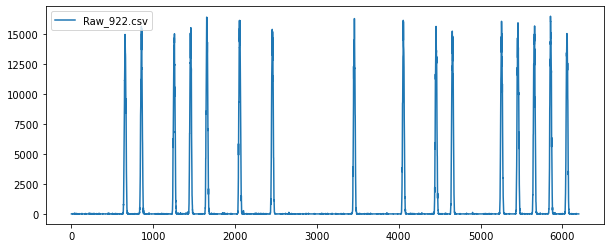

In [17]:
fig, ax = plt.subplots(figsize = (10,4))
plt.plot(x,y, label = '%s'%fileName)
plt.legend()

### Notice that there are some small, spiky counts.  The raw input should be smoothed before processing.

In [18]:
def normVector(npArray, retFactor = False):
    '''
    Normalize any input vector.
    Drive maximum to 1.0
    '''
    if retFactor:
        return npArray/npArray.max(), npArray.max()
    else:
        return npArray/npArray.max()

#### Support Functions

In [19]:
def expandSequence(seq, osFactor = 200, singlePulse = False, scaleFactor = 0.5):
    '''
    Expand a PRBS by a target over sampling factor (osFactor)
    scaleFactor can be used to scale the matrix if needed.
    '''
    
    seqLen = len(seq)
    newSeq = np.zeros(osFactor*len(seq))
    j = -1
    maxVal = seq.max()*scaleFactor
    minVal = seq.min()*scaleFactor
    for i,v in enumerate(newSeq):# go through each element
        if i%osFactor == 0:#reset count when the oversampling factor is reached
            j+=1 #start counting upward
            curVal = seq[j]

            if singlePulse:
                if curVal > maxVal:
                    newSeq[i] = curVal
                    curVal = 0
                elif curVal < minVal:

                    newSeq[i] = curVal
                    curVal = 0
                else:
                    curVal = 0
                
            else:
                newSeq[i] = curVal
        else:
            newSeq[i] = curVal
        
    return newSeq
        
    

In [20]:
def periodic_corr(x, y):
    """Periodic correlation, implemented using the FFT.

    x and y must be real sequences with the same length.
    """
    return ifft(fft(x) * fft(y).conj()).real

### Artifact Mitigation Transform (Algorithm #2)
~~~python
rawData #raw, untransformed data 
maskMTX #populated mask matrix
transformedMTX #matrix of zeros to contain transform data
for i,row in enumerate(maskMTX):
    maskSeq = maskMTX[i]
    tempTransform = HT(rawData, maskSeq)
    transformedMTX[i] = copy(tempTransform)

weightedVector #empty vector that will deweight transform artifacts
for j,column in enumerate(transformedMTX):
    weightedVector[j] = stdDev(maskMTX[:,j])#capture variation across transformed data

nativeT = HT(rawData, prbs)
endResult = weightedVector*nativeT                            
~~~

### The following contains multiple calls.  Arguably the masked matrix and its inverse need only be calculated once.

In [21]:
def createMaskedTransformMTX(intVec, invMtx, bitOrder = 5, osFactor = 158, filterType = 'W', maskType = 'R', maskWindow = 5, randBool = False):
    '''
    Accepts: 
        The intensity vector for transform (intVec)
        Inverted matrix of the masked matrix (invMtx)
        Bit order of the sequence under test (bitOrder)
        Oversampling Factor (osFactor)
        Mask Window (see Above, Algorithm #1)
    
    Returns the transfomred matrix. 
    
    '''
    sumDecon = np.zeros_like(intVec)
    sLen = int(2**bitOrder - 1)#sequence length of the raw masks
    colMod = 1#not used currently but left for posterity
    sumMtx = np.zeros((len(intVec), invSeq.shape[0]*colMod))

    if filterType == 'S':#Savitsky Golay Smoothing to minimize spikes from TOF data
        yF = signal.savgol_filter(intVec, 27, 3)#These are hard coded and it may be good to optimize
    if filterType == None:
        yF = intVec

        
        
    #see above for a longer descriptions    
    win = maskWindow
    np.random.seed(42)#done to make sure results are reproducible
    for i in range(invSeq.shape[0]*colMod):
        tempInv = invMtx[:,i%sLen]
        if i > 0:
            if randBool:#use for the randomization of the mask
                tempInd = np.random.randint(sLen, size = int(sLen/2))
                tempInv[tempInd] = 0
            else:
                indA = np.random.randint(sLen)
                indB = (indA+win)%sLen
                tempInv[indA:indB] = 0

        invExp = expandSequence(tempInv, osFactor = osFactor, singlePulse = True)#expand sequence
        tempCC = periodic_corr(yF, invExp) #perform cross correlation and deconvolution
        sumDecon+=np.roll(normVector(tempCC), osFactor*i)
        sumMtx[:,i%sLen]+= np.roll(normVector(tempCC), osFactor*i)

    return sumMtx

In [22]:
def demuxFromMatrix(dmxMTX, seq, cutOff = 0):
    '''
    Accepts the matrix that has been demultiplexed and contains the amplified transform errors. 
    It is possible to deweight by standard deviation or by noting the number of 
    sign changes (which is an indirect capture of spectral variability induced by the artifacts)
    
    Returns:
        1) The raw transform zeroed at points where negative signs occur
        2) The locations where the sign occurs
    
    '''
    posVector = np.zeros_like(seq)
    negLocs = np.zeros_like(seq)+1
    mtxShape = dmxMTX.shape[0]
    for i in range(mtxShape):
        negCount = np.sum(dmxMTX[i,:]<cutOff, axis = 0)
        if negCount == 0:
            negLocs[i] = 0
            posVector[i]+=dmxMTX[:,0][i]
    return posVector, negLocs

In [23]:
def plotDemux(dmxVector, xVec, rawVector, mzVal = '', saveBool = False):
    fig, axList = plt.subplots(nrows= 1, ncols = 2, figsize = (12,6))
    fs = 18
    fig.suptitle("Extracted Ion Mobility Spectrum\nm/z: %.2f"%mzVal, fontsize = fs+2)
    
    newY = rawVector
    posVector = dmxVector
    ax = axList[0]
    
    offset = posVector.max()
    ax.plot(xVec, newY, label = "Raw Transform")
    ax.fill_between(xVec, 0, newY, alpha = 0.25)
    ax.plot(xVec, posVector+offset, label = "WSU DEMUX")
    ax.fill_between(xSeq, offset, posVector+offset, alpha = 0.25)

    ax.set_xlabel("Drift Time (ms)", fontsize = fs)
    ax.set_ylabel("Normalized Intensity (a.u.)", fontsize = fs)
    ax.tick_params(axis = 'both', labelsize = fs-4)
    ax.legend(fontsize = fs-8)


    ax = axList[1]
    ax.plot(xVec, newY, label = "Raw Transform")
    ax.fill_between(xVec, 0, newY, alpha = 0.25)
    ax.plot(xVec, posVector+offset, label = "WSU DEMUX")
    ax.fill_between(xVec, offset, posVector+offset, alpha = 0.25)
    
    ax.set_xlabel("Drift Time (ms)", fontsize = fs)
    ax.set_ylabel("Normalized Intensity (a.u.)", fontsize = fs)
    ax.tick_params(axis = 'both', labelsize = fs-4)
    maxInd = posVector.argmax()
    scale = int(0.05*len(posVector))
    startInd = maxInd-scale
    if startInd < 0:
        startInd = 0
    endInd = maxInd+scale
    if endInd > len(posVector):
        endInd = len(posVector)

    ax.set_xlim(xSeq[startInd], xSeq[endInd])
    
    
    fig.subplots_adjust(wspace=.25)
    
    if saveBool:
        plt.savefig("DEMUX_ZOOM_%d"%mz)

____

## Condensed Worflow

In [24]:
csvFiles = ['Raw_622.csv', 'Raw_922.csv', 'Raw_1822.csv']

In [25]:
fileName = csvFiles[0] #622

Load Target CSV

In [26]:
data = np.loadtxt(fileName, delimiter = ',')
x = data[:,0]
y = data[:,1]

In [27]:
seqTxt = '0000100101100111110001101110101'
seq = []
for e in seqTxt:
    seq.append(int(e))

In [28]:
seq = np.array(seq, dtype = np.float)#convert sequence

In [29]:
mtx = createSeqMTX(seq)

In [30]:
invprs = np.linalg.inv(mtx)#create inverse of the matrix

In [31]:
invSeq = invprs[:,0] #grab the first row

In [32]:
mtxUS = createSeqMTX(seq)#unscaled MTX
invMtxUS = np.linalg.inv(mtxUS)
invSeqUS = invMtxUS[:,0]

Raw_622.csv


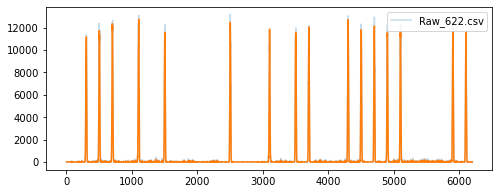

In [33]:
fig = plt.figure(figsize = (8,3))
print(fileName)
#smoothing of signal
ySmth = signal.savgol_filter(y, 5, 3)
plt.plot(x,y, alpha = 0.25, label = "%s"%fileName)
plt.plot(x,ySmth)
plt.legend()

In [59]:
osFactor = 200
sumMtx = createMaskedTransformMTX(normVector(y), invMtxUS, bitOrder = 5, osFactor = osFactor, filterType = 'S', maskWindow = 5)

In [60]:
pSeq = expandSequence(seq, osFactor = osFactor)

In [61]:
timeSpacing = 0.165576 #see above

In [62]:
xSeq = np.arange(len(pSeq))*timeSpacing

In [63]:
dmxVec, negLocs = demuxFromMatrix(sumMtx, xSeq, 0)

In [64]:
mzVal = fileName.split('_')[-1]
mzVal = int(mzVal.split('.csv')[0])

## Use dmxVec if you want to see the result where large degrees of variation in the demultiplexed spectra are zeroed (i.e. the quick and an less than elegant solution) (Not too bad actually). 
## Use the deweighted version for comparison. The manuscript uses the deweighting version as it preserves peak shape for ion populations displaying larger tails (i.e. larger m/z ions).

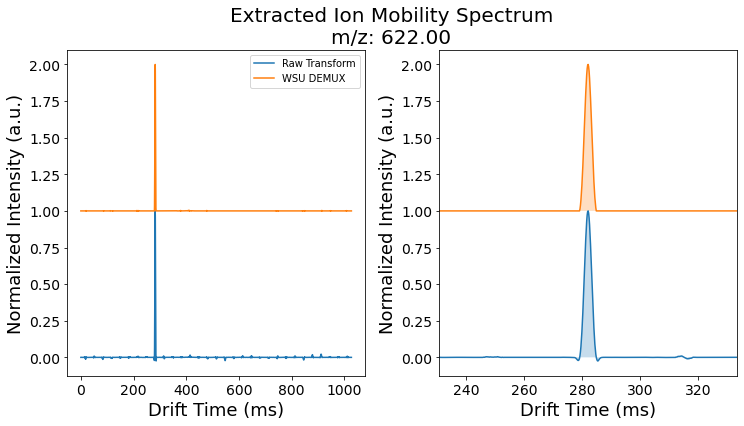

In [65]:
rawVector = sumMtx[:,0]
plotDemux(dmxVec, xSeq, rawVector, mzVal = mzVal)

### The following import is needed if you want to intelligently deweight rather than drive to 0.

In [41]:
from astropy.convolution import Gaussian1DKernel, convolve

In [42]:
gauss = Gaussian1DKernel(stddev=20)#Setup convolution kernel for deweighting spikes/transform artifacts

In [43]:
locG = np.convolve(1-negLocs,gauss.array, 'same') #local gaussian to deweight areas of high variability

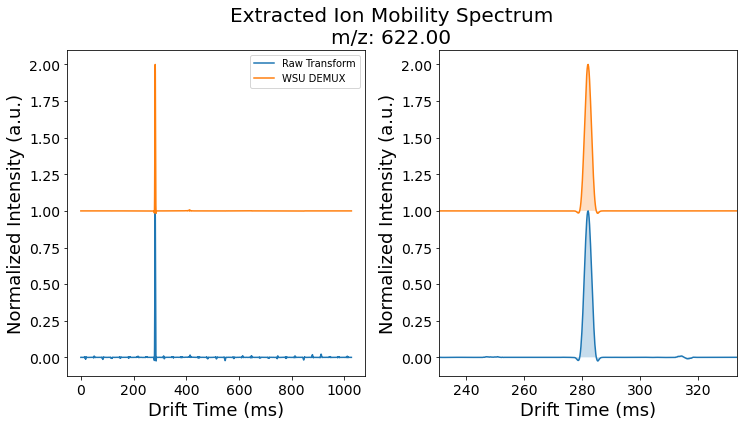

In [44]:
fixedVec = normVector(rawVector*locG)
plotDemux(fixedVec, xSeq, rawVector, mzVal = mzVal, saveBool = False)